<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h1>Classification Analysis - Apprentice Chef</h1>
<br><br>
Vinicius Yoshinaga Ishizaki<br>
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [15]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
chef = pd.read_excel(io = './Apprentice_Chef_Dataset.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Functions</h2>
Defining the functions that will be utilized on the analysis

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [16]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [17]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Data massaging</h2>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [18]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [19]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain'] # We don't need the first column


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
cocacola.com         28
jnj.com              28
mcdonalds.com        28
nike.com             27
apple.com            27
dupont.com           26
ibm.com              26
ge.org               26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
verizon.com          22
mmm.com              22
caterpillar.com      22
pg.com               22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [20]:
# email domain types
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
        else:
            placeholder_lst.append('professional')


# concatenating with original DataFrame
chef['email_domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['email_domain_group'].value_counts()



personal        861
professional    696
junk            389
Name: email_domain_group, dtype: int64

In [21]:
# Creating email domain dummy to identify junk email
chef['dummy_junk_email']   = 0
chef['dummy_professional_email']      = 0



# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows(): #iterates over rows and columns
        
    # Junk Email
    if chef.loc[index, 'email_domain_group'] == 'junk':
        chef.loc[index, 'dummy_junk_email'] = 1
        
        
    # Personal Email
    if chef.loc[index, 'email_domain_group'] == 'professional':
        chef.loc[index, 'dummy_professional_email'] = 1
        
# checking results
chef[['dummy_junk_email', 'dummy_professional_email']].head()

,dummy_junk_email,dummy_professional_email
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
# We identified that the column LARGEST_ORDER_SIZE is actually the AVERAGE number of meals ordered per customer
# So we renamed this column to AVG_MEALS_PER_CUSTOMER
chef.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_MEALS_PER_CUSTOMER'}, inplace=True)

In [23]:
# Creating a base for cancellation dummy variable
chef_canc = chef.copy()
sum_column = chef_canc['CANCELLATIONS_BEFORE_NOON'] + chef_canc['CANCELLATIONS_BEFORE_NOON']
chef_canc['Cancellations_group'] = sum_column

In [24]:
# We tried to create a new variable based on revenue and meals ordered to see if we improve the correlation
# with our y variable

avg_sell_price = chef_canc['REVENUE'] / chef_canc['TOTAL_MEALS_ORDERED']
chef_canc['Avg_sell_price'] = avg_sell_price
chef['dummy_meal_sold_with_alcohol']   = 0

for index, value in chef.iterrows(): #iterates over rows and columns
    # creating dummy for meal sold with alcohol
    if chef_canc.loc[index, 'Avg_sell_price'] >= 30:
        chef.loc[index, 'dummy_meal_sold_with_alcohol'] = 1

In [25]:
# creating dummy variables for better analysis:
chef['dummy_subscribe_to_weekly_plan']   = 0
chef['dummy_view_photos']      = 0
chef['dummy_has_cancellation']      = 0
chef['dummy_specified_taste']      = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows(): #iterates over rows and columns
        
    # Weekly plan
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'dummy_subscribe_to_weekly_plan'] = 1
        
        
    # Total photos viewed
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'dummy_view_photos'] = 1
        
    # Total photos viewed
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'dummy_view_photos'] = 1
        
    # Has cancellation
    if chef_canc.loc[index, 'Cancellations_group'] > 0:
        chef.loc[index, 'dummy_has_cancellation'] = 1
        
    # Total photos viewed
    if chef.loc[index, 'TASTES_AND_PREFERENCES'] > 0:
        chef.loc[index, 'dummy_specified_taste'] = 1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Correlation analysis</h2>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [26]:
# Running correlation analysis for relevance
df_corr = chef.corr(method='pearson')

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False).round(4)

CROSS_SELL_SUCCESS                1.0000
dummy_professional_email          0.1941
CANCELLATIONS_BEFORE_NOON         0.1634
dummy_has_cancellation            0.1386
MOBILE_NUMBER                     0.1027
dummy_specified_taste             0.0814
TASTES_AND_PREFERENCES            0.0814
REFRIGERATED_LOCKER               0.0683
PC_LOGINS                         0.0445
PACKAGE_LOCKER                    0.0435
MASTER_CLASSES_ATTENDED           0.0372
CONTACTS_W_CUSTOMER_SERVICE       0.0365
AVG_PREP_VID_TIME                 0.0321
MEDIAN_MEAL_RATING                0.0318
AVG_MEALS_PER_CUSTOMER            0.0222
EARLY_DELIVERIES                  0.0151
AVG_TIME_PER_SITE_VISIT           0.0111
dummy_view_photos                 0.0109
TOTAL_PHOTOS_VIEWED               0.0102
LATE_DELIVERIES                   0.0067
TOTAL_MEALS_ORDERED               0.0065
PRODUCT_CATEGORIES_VIEWED         0.0047
REVENUE                           0.0045
UNIQUE_MEALS_PURCH                0.0011
WEEKLY_PLAN     

In [27]:
# Running correlation analysis for relevance
df_corr = chef.corr(method='pearson')

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False).round(4)

CROSS_SELL_SUCCESS                1.0000
dummy_professional_email          0.1941
CANCELLATIONS_BEFORE_NOON         0.1634
dummy_has_cancellation            0.1386
MOBILE_NUMBER                     0.1027
dummy_specified_taste             0.0814
TASTES_AND_PREFERENCES            0.0814
REFRIGERATED_LOCKER               0.0683
PC_LOGINS                         0.0445
PACKAGE_LOCKER                    0.0435
MASTER_CLASSES_ATTENDED           0.0372
CONTACTS_W_CUSTOMER_SERVICE       0.0365
AVG_PREP_VID_TIME                 0.0321
MEDIAN_MEAL_RATING                0.0318
AVG_MEALS_PER_CUSTOMER            0.0222
EARLY_DELIVERIES                  0.0151
AVG_TIME_PER_SITE_VISIT           0.0111
dummy_view_photos                 0.0109
TOTAL_PHOTOS_VIEWED               0.0102
LATE_DELIVERIES                   0.0067
TOTAL_MEALS_ORDERED               0.0065
PRODUCT_CATEGORIES_VIEWED         0.0047
REVENUE                           0.0045
UNIQUE_MEALS_PURCH                0.0011
WEEKLY_PLAN     

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Data Modelling</h2>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [28]:
# We excluded some categorical variables that will not be used in our models
x_variables_drop = ['CROSS_SELL_SUCCESS', 'NAME','EMAIL','FIRST_NAME','FAMILY_NAME','MOBILE_NUMBER','email_domain',
               'email_domain_group']

# declaring explanatory variables
chef_data = chef.drop(x_variables_drop, axis = 1)

# Saving x variables in a list
x_variables = chef_data.columns.values

# declaring response variable
chef_target = chef.loc[:, 'CROSS_SELL_SUCCESS']

In [29]:
# get mean and sum for multiple variables
for val in x_variables:
#     print(f"'{val}': [np.mean, np.sum, min, max],")
    print(f"'{val}': [np.sum, np.mean],")

'REVENUE': [np.sum, np.mean],
'TOTAL_MEALS_ORDERED': [np.sum, np.mean],
'UNIQUE_MEALS_PURCH': [np.sum, np.mean],
'CONTACTS_W_CUSTOMER_SERVICE': [np.sum, np.mean],
'PRODUCT_CATEGORIES_VIEWED': [np.sum, np.mean],
'AVG_TIME_PER_SITE_VISIT': [np.sum, np.mean],
'CANCELLATIONS_BEFORE_NOON': [np.sum, np.mean],
'CANCELLATIONS_AFTER_NOON': [np.sum, np.mean],
'TASTES_AND_PREFERENCES': [np.sum, np.mean],
'PC_LOGINS': [np.sum, np.mean],
'MOBILE_LOGINS': [np.sum, np.mean],
'WEEKLY_PLAN': [np.sum, np.mean],
'EARLY_DELIVERIES': [np.sum, np.mean],
'LATE_DELIVERIES': [np.sum, np.mean],
'PACKAGE_LOCKER': [np.sum, np.mean],
'REFRIGERATED_LOCKER': [np.sum, np.mean],
'AVG_PREP_VID_TIME': [np.sum, np.mean],
'AVG_MEALS_PER_CUSTOMER': [np.sum, np.mean],
'MASTER_CLASSES_ATTENDED': [np.sum, np.mean],
'MEDIAN_MEAL_RATING': [np.sum, np.mean],
'AVG_CLICKS_PER_VISIT': [np.sum, np.mean],
'TOTAL_PHOTOS_VIEWED': [np.sum, np.mean],
'dummy_junk_email': [np.sum, np.mean],
'dummy_professional_email': [np.sum, np.mean],
'd

In [30]:
# Generating a pivot table to analyse insights
pd.pivot_table(chef, values=x_variables, index=['CROSS_SELL_SUCCESS'],
                    aggfunc={'REVENUE': [np.sum, np.mean],
                            'TOTAL_MEALS_ORDERED': [np.sum, np.mean],
                            'UNIQUE_MEALS_PURCH': [np.sum, np.mean],
                            'CONTACTS_W_CUSTOMER_SERVICE': [np.sum, np.mean],
                            'PRODUCT_CATEGORIES_VIEWED': [np.sum, np.mean],
                            'AVG_TIME_PER_SITE_VISIT': [np.sum, np.mean],
                            'CANCELLATIONS_BEFORE_NOON': [np.sum, np.mean],
                            'CANCELLATIONS_AFTER_NOON': [np.sum, np.mean],
                            'TASTES_AND_PREFERENCES': [np.sum, np.mean],
                            'PC_LOGINS': [np.sum, np.mean],
                            'MOBILE_LOGINS': [np.sum, np.mean],
                            'WEEKLY_PLAN': [np.sum, np.mean],
                            'EARLY_DELIVERIES': [np.sum, np.mean],
                            'LATE_DELIVERIES': [np.sum, np.mean],
                            'PACKAGE_LOCKER': [np.sum, np.mean],
                            'REFRIGERATED_LOCKER': [np.sum, np.mean],
                            'AVG_PREP_VID_TIME': [np.sum, np.mean],
                            'AVG_MEALS_PER_CUSTOMER': [np.sum, np.mean],
                            'MASTER_CLASSES_ATTENDED': [np.sum, np.mean],
                            'MEDIAN_MEAL_RATING': [np.sum, np.mean],
                            'AVG_CLICKS_PER_VISIT': [np.sum, np.mean],
                            'TOTAL_PHOTOS_VIEWED': [np.sum, np.mean],
                            'dummy_junk_email': [np.sum, np.mean],
                            'dummy_professional_email': [np.sum, np.mean],
                            'dummy_meal_sold_with_alcohol': [np.sum, np.mean],
                            'dummy_subscribe_to_weekly_plan': [np.sum, np.mean],
                            'dummy_view_photos': [np.sum, np.mean],
                            'dummy_has_cancellation': [np.sum, np.mean],
                            'dummy_specified_taste': [np.sum, np.mean]}).round(4)

AVG_CLICKS_PER_VISIT          AVG_MEALS_PER_CUSTOMER         AVG_PREP_VID_TIME           AVG_TIME_PER_SITE_VISIT            CANCELLATIONS_AFTER_NOON        CANCELLATIONS_BEFORE_NOON         CONTACTS_W_CUSTOMER_SERVICE         EARLY_DELIVERIES         LATE_DELIVERIES         MASTER_CLASSES_ATTENDED        MEDIAN_MEAL_RATING         MOBILE_LOGINS         PACKAGE_LOCKER        PC_LOGINS         PRODUCT_CATEGORIES_VIEWED         REFRIGERATED_LOCKER           REVENUE            TASTES_AND_PREFERENCES        TOTAL_MEALS_ORDERED          TOTAL_PHOTOS_VIEWED           UNIQUE_MEALS_PURCH         WEEKLY_PLAN          dummy_has_cancellation        dummy_junk_email        dummy_meal_sold_with_alcohol        dummy_professional_email        dummy_specified_taste        dummy_subscribe_to_weekly_plan        dummy_view_photos       
                                   mean      sum                   mean     sum              mean       sum                    mean        sum                     mean    sum                      mean     sum                        mean     sum             mean     sum            mean     sum                    mean    sum               mean     sum          mean     sum           mean    sum      mean     sum                      mean     sum                mean    sum       mean        sum                   mean    sum                mean      sum                mean       sum               mean     sum        mean      sum                   mean    sum             mean    sum                         mean    sum                     mean    sum                  mean    sum                           mean    sum              mean    sum
CROSS_SELL_SUCCESS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0                               13.6272   8517.0                 4.3872  2742.0          148.2485   92655.3                 98.5973   61623.34                   0.2000  125.0                    1.0368   648.0                      6.8624  4289.0           1.4352   897.0          2.9440  1840.0                  0.5696  356.0             2.7600  1725.0        1.5152   947.0         0.3248  203.0    5.4784  3424.0                    5.3632  3352.0              0.0816   51.0  2099.7808  1312363.0                 0.6608  413.0             74.1136  46321.0            103.7568   64848.0             4.9008  3063.0     11.4352   7147.0                 0.5616  351.0           0.3632  227.0                       0.6048  378.0                   0.2224  139.0                0.6608  413.0                         0.7712  482.0            0.4064  254.0
1                               13.4519  17770.0                 4.4610  5893.0          151.6486  200327.8                100.0812  132207.31                   0.1499  198.0                    1.5791  2086.0                      7.0409  9301.0           1.5102  1995.0          2.9833  3941.0                  0.6207  820.0             2.8115  3714.0        1.4580  1926.0         0.3694  488.0    5.5337  7310.0                    5.3936  7125.0              0.1279  169.0  2110.8467  2788428.5                 0.7396  977.0             74.8804  98917.0            107.7002  142272.0             4.9069  6482.0     11.2801  1

In [31]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [32]:
# Because of the difference in the proportions, we opt to use stratify on our training and testing data
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [33]:
# For loop to get variables ready for the formulas
for val in chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 AVG_MEALS_PER_CUSTOMER + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 dummy_junk_email + 
 dummy_professional_email + 
 dummy_meal_sold_with_alcohol + 
 dummy_subscribe_to_weekly_plan + 
 dummy_view_photos + 
 dummy_has_cancellation + 
 dummy_specified_taste + 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Logistic Regression using StatsModel</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [34]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         REVENUE + 
                                         TOTAL_MEALS_ORDERED + 
                                         UNIQUE_MEALS_PURCH + 
                                         CONTACTS_W_CUSTOMER_SERVICE + 
                                         PRODUCT_CATEGORIES_VIEWED + 
                                         AVG_TIME_PER_SITE_VISIT + 
                                         CANCELLATIONS_BEFORE_NOON + 
                                         CANCELLATIONS_AFTER_NOON + 
                                         TASTES_AND_PREFERENCES + 
                                         PC_LOGINS + 
                                         MOBILE_LOGINS + 
                                         WEEKLY_PLAN + 
                                         EARLY_DELIVERIES + 
                                         LATE_DELIVERIES + 
                                         PACKAGE_LOCKER + 
                                         REFRIGERATED_LOCKER + 
                                         AVG_PREP_VID_TIME + 
                                         AVG_MEALS_PER_CUSTOMER + 
                                         MASTER_CLASSES_ATTENDED + 
                                         MEDIAN_MEAL_RATING + 
                                         AVG_CLICKS_PER_VISIT + 
                                         TOTAL_PHOTOS_VIEWED + 
                                         dummy_junk_email + 
                                         dummy_professional_email + 
                                         dummy_meal_sold_with_alcohol + 
                                         dummy_subscribe_to_weekly_plan + 
                                         dummy_view_photos + 
                                         dummy_has_cancellation + 
                                         dummy_specified_taste""",
                                         data    = chef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.555154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1430
Method:                           MLE   Df Model:                           28
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1159
Time:                        20:29:27   Log-Likelihood:                -809.97
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.952e-30
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.3214      1.345     -0.982      0.326      -3.958       1.316
REVENUE                        -8.807e-05   9.71e-05     -0.907      0.364      -0.000       0.000
TOTAL_MEALS_ORDERED               -0.0032      0.002     -1.627      0.104      -0.007       0.001
UNIQUE_MEALS_PURCH                -0.0190      0.026     -0.739      0.460      -0.069       0.031
CONTACTS_W_CUSTOMER_SERVICE        0.0638      0.028      2.256      0.024       0.008       0.119
PRODUCT_CATEGORIES_VIEWED         -0.0148      0.020     -0.733      0.464      -0.054       0.025
AVG_TIME_PER_SITE_VISIT            0.0003      0.001      0.287      0.774      -0.002       0.002
CANCELLATIONS_BEFORE_NOON          0.2419      0.063      3.842      0.000       0.118       0.365
CANCELLATIONS_AFTER_NOON          -0.1706      0.138     -1.233      0.218      -0.442       0.101
TASTES_AND_PREFERENCES             0.1717   3.51e+06   4.89e-08      1.000   -6.89e+06    6.89e+06
PC_LOGINS                          0.2413      0.106      2.268      0.023       0.033       0.450
MOBILE_LOGINS                     -0.2313      0.116     -1.987      0.047      -0.460      -0.003
WEEKLY_PLAN                        0.0069      0.005      1.316      0.188      -0.003       0.017
EARLY_DELIVERIES                   0.0579      0.027      2.142      0.032       0.005       0.111
LATE_DELIVERIES                    0.0055      0.022      0.251      0.802      -0.038       0.049
PACKAGE_LOCKER                    -0.0033      0.145     -0.023      0.982      -0.288       0.282
REFRIGERATED_LOCKER                0.3957      0.231      1.710      0.087      -0.058       0.849
AVG_PREP_VID_TIME                  0.0045      0.003      1.668      0.095      -0.001       0.010
AVG_MEALS_PER_CUSTOMER            -0.0318      0.069     -0.459      0.646      -0.167       0.104
MASTER_CLASSES_ATTENDED            0.1412      0.114      1.234      0.217      -0.083       0.365
MEDIAN_MEAL_RATING                 0.1451      0.167      0.870      0.384      -0.182       0.472
AVG_CLICKS_PER_VISIT              -0.0126      0.051     -0.250      0.803      -0.112       0.086
TOTAL_PHOTOS_VIEWED               -0.0007      0.001     -1.318      0.188      -0.002       0.000
dummy_junk_email                  -1.2877      0.157     -8.216      0.000      -1.595      -0.980
dummy_professional_email           0.5391      0.143      3.779      0.000       0.259       0.819
dummy_meal_sold_with_alcohol      -0.3643      0.182     -2.005      0.045      -0.720      -0.008
dummy_subscribe_to_weekly_plan    -0.1610      0.161     -0.999      0.318      -0.477       0.155
dummy_view_photos                  0.2014      0.180      1.117      0.264      -0.152       0.555
dummy_has_cancellation             0.1180      0.174      0.679      0.497      -0.222       0.458
dummy_specified_taste              0.1717   3.51e+06   4.89e-08      1.00

In [35]:
# We ran the regression again removing all of the non-significant variables according to the previous model.

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         PC_LOGINS + 
                                         MOBILE_LOGINS + 
                                         REFRIGERATED_LOCKER + 
                                         MEDIAN_MEAL_RATING +
                                         dummy_junk_email + 
                                         dummy_professional_email + 
                                         dummy_has_cancellation + 
                                         dummy_specified_taste""",
                                         data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.569053
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                 0.09381
Time:                        20:29:27   Log-Likelihood:                -830.25
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.176e-33
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.2057      0.655     -1.840      0.066      -2.490       0.079
PC_LOGINS                    0.2261      0.104      2.167      0.030       0.022       0.431
MOBILE_LOGINS               -0.2291      0.113     -2.019      0.043      -0.451      -0.007
REFRIGERATED_LOCKER          0.4492      0.200      2.243      0.025       0.057       0.842
MEDIAN_MEAL_RATING           0.1689      0.080      2.100      0.036       0.011       0.326
dummy_junk_email            -1.2149      0.151     -8.030      0.000      -1.511      -0.918
dummy_professional_email     0.5147      0.140      3.673      0.000       0.240       0.789
dummy_has_cancellation       0.5860      0.123      4.749      0.000       0.344       0.828
dummy_specified_taste        0.3709      0.131      2.828      0.005       0.114       0.628
============================================================================================
"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Logistic Regression using Scikit Learn</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [36]:
# creating a dictionary to store candidate models
# For the full model we removed the variables that originated the dummies because the dummies proved to be better

candidate_dict = {

 # full model
 'logit_full'   : ['UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                   'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_MEALS_PER_CUSTOMER', 
                   'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
                   'dummy_junk_email','dummy_has_cancellation','dummy_specified_taste',
                   'dummy_professional_email', 'dummy_meal_sold_with_alcohol'],
 

 # Model without without the new dummies, except for email because email only had categorical variables
 'logit_sig'    : ['REVENUE','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES','PC_LOGINS',
                   'MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','REFRIGERATED_LOCKER','AVG_PREP_VID_TIME',
                   'MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','TOTAL_PHOTOS_VIEWED', 'dummy_junk_email', 
                   'dummy_professional_email'],
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['PC_LOGINS', 'MOBILE_LOGINS', 'REFRIGERATED_LOCKER', 'MEDIAN_MEAL_RATING',
                   'dummy_junk_email','dummy_has_cancellation','dummy_specified_taste','dummy_professional_email'],

     # significant variables only (set 3)
'logit_sig_3'  : ['CONTACTS_W_CUSTOMER_SERVICE','MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
'TASTES_AND_PREFERENCES','PC_LOGINS','EARLY_DELIVERIES', 'dummy_junk_email','dummy_professional_email']

}

In [37]:
# train/test split with the full model
chef_data_dict   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_data_full   =  chef.loc[ : , candidate_dict['logit_sig_3']]

# train test with significant variables
x_train, x_test, y_train, y_test = train_test_split(
            chef_data_dict,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

# train test almost full
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
            chef_data_full,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4)
logreg_test_score = logreg_fit.score(x_test, y_test).round(4)

# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(4)
# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

LogReg Training ACCURACY: 0.7156
LogReg Testing  ACCURACY: 0.7064
AUC Score        : 0.6078


In [38]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 39
True Positives : 292



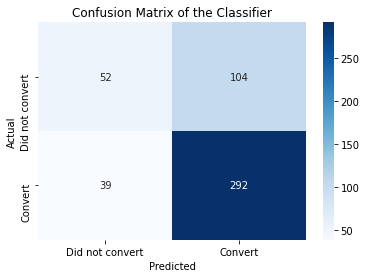

In [39]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Did not convert', 'Convert'])

In [40]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef_data_dict.columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.18)
('PC_LOGINS', 0.22)
('MOBILE_LOGINS', -0.22)
('REFRIGERATED_LOCKER', 0.43)
('MEDIAN_MEAL_RATING', 0.17)
('dummy_junk_email', -1.19)
('dummy_has_cancellation', 0.58)
('dummy_specified_taste', 0.36)
('dummy_professional_email', 0.51)


In [41]:
# loading model performance
model_performance = pd.read_excel('./model_results/classification_model_performance.xlsx')

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Logistic',
                          'Training Accuracy'  : logreg_train_score,
                          'Testing Accuracy'   : logreg_test_score,
                          'AUC Score'          : logreg_auc_score,
                          'Confusion Matrix'   : (logreg_tn,
                                                  logreg_fp,
                                                  logreg_fn,
                                                  logreg_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Decision Tree using Scikit Learn</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [48]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(min_samples_leaf=25, #We can also add float on the min sample leaf
                    max_depth = 4,
                    random_state = 219)

# Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 1.3000000000000003}
# Tuned CV AUC      : 0.6081
# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
p_tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = p_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = p_tree_pred).round(4) # auc

Training ACCURACY: 0.7258
Testing  ACCURACY: 0.7105
AUC Score        : 0.6176


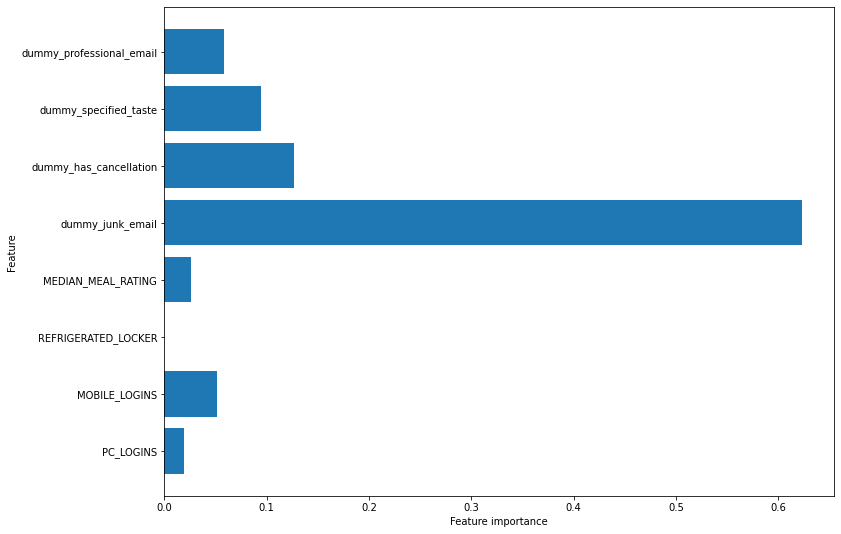

In [49]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train  = x_train,
                         export = False)

In [50]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = p_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 41
True Positives : 290



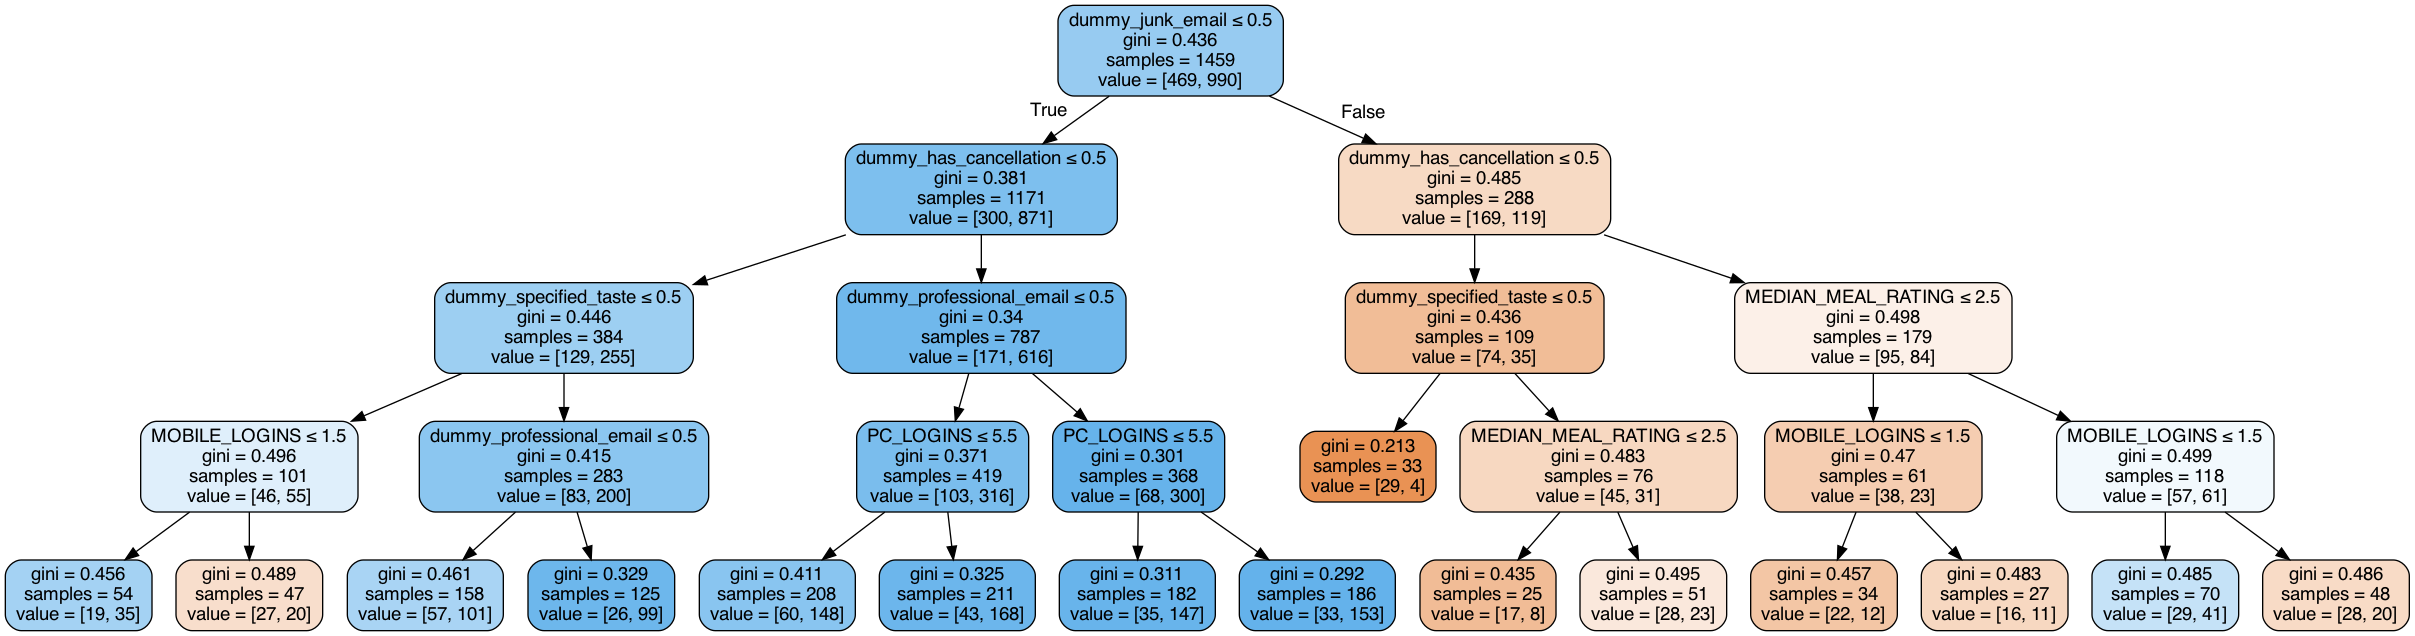

In [51]:
# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = x_train)

In [52]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Pruned Tree (Full)',
                          'Training Accuracy'  : pruned_tree_train_score,
                          'Testing Accuracy'   : pruned_tree_test_score,
                          'AUC Score'          : pruned_tree_auc_score,
                          'Confusion Matrix'   : (pruned_tree_tn,
                                                  pruned_tree_fp,
                                                  pruned_tree_fn,
                                                  pruned_tree_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Hyperparameter Tuning with RandomizedSearchCV on Logistic Regression</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [53]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
################### Commented for performance
# lr_tuned_cv.fit(chef_data_full, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [54]:
# checking the results of RandomizedSearch CV
lr_tuned_cv.cv_results_

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [55]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [56]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
# Commented for performance
# lr_tuned = lr_tuned_cv.best_estimator_

lr_tuned = LogisticRegression(C=1.4000000000000001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

# FIT step is not needed
lr_tuned_fit = lr_tuned.fit(chef_data_full, chef_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned_fit.predict(x_test_full)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train_full, y_train_full).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test_full, y_test_full).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test_full,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7265
Testing  ACCURACY: 0.7331
AUC Score        : 0.6308


In [57]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test_full, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 54
False Positives: 102
False Negatives: 28
True Positives : 303



In [58]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train_full, y_train_full).round(4)
lr_test_acc  = lr_tuned.score(x_test_full, y_test_full).round(4)
lr_auc       = roc_auc_score(y_true  = y_test_full,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)
# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Hyperparameter Tuning with RandomizedSearchCV on Classification Trees</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [59]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
################### Commented for performance
# tuned_tree_cv.fit(chef_data_full, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [60]:
# checking the best estimator for the model
tuned_tree_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [61]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=219, splitter='random')

# FIT step is not needed
tree_tuned_fit = tree_tuned.fit(chef_data_full, chef_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned_fit.predict(x_test_full)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train_full, y_train_full).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test_full, y_test_full).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test_full,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.73
Testing  ACCURACY: 0.7392
AUC Score        : 0.637


In [62]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test_full, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 55
False Positives: 101
False Negatives: 26
True Positives : 305



In [63]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train_full, y_train_full).round(4)
tree_test_acc  = tree_tuned.score(x_test_full, y_test_full).round(4)
tree_auc       = roc_auc_score(y_true  = y_test_full,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


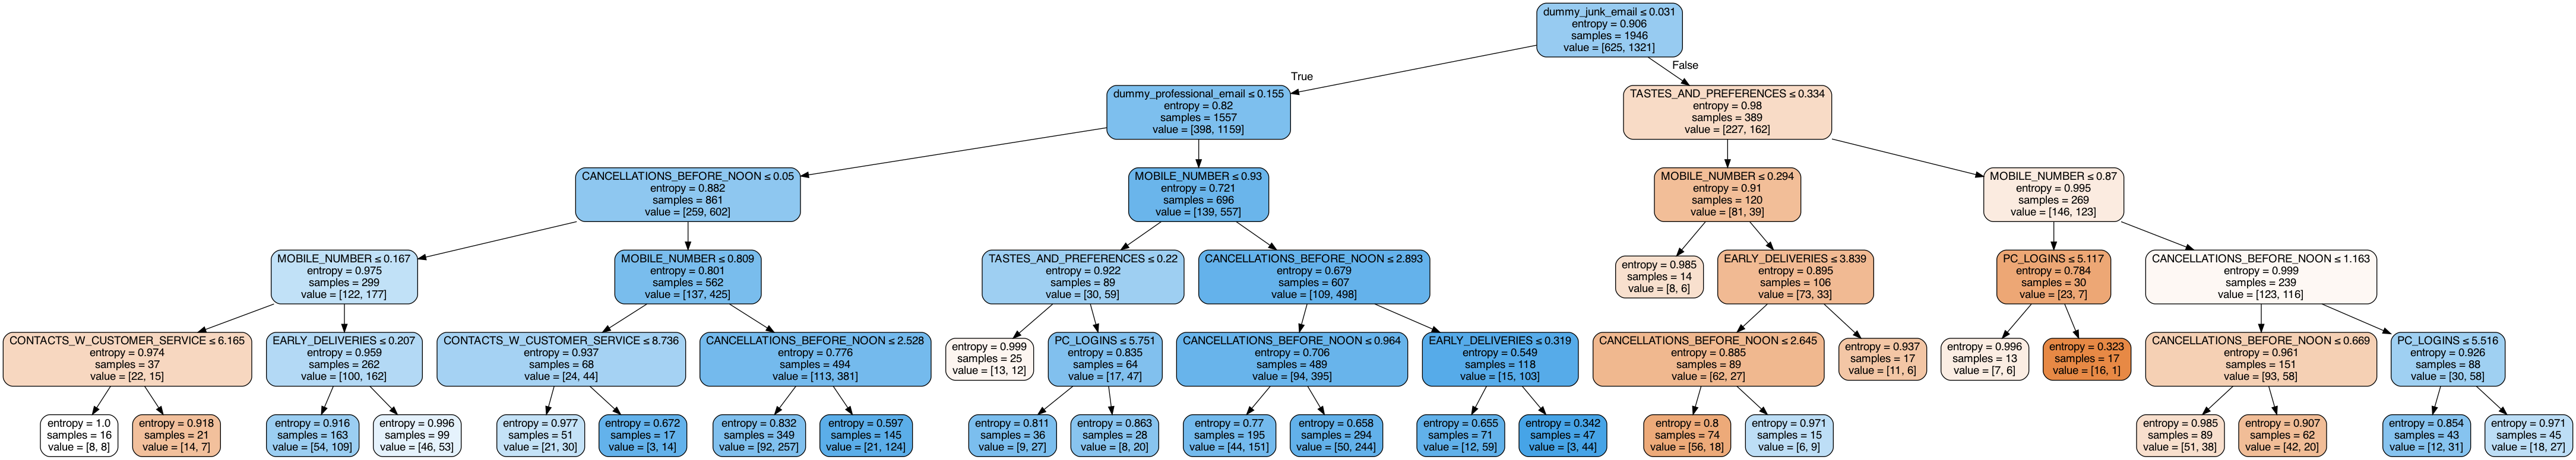

In [64]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = chef_data_full,
             height = 1500,
             width  = 1500)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Random Forest</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [65]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 150,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [66]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train_full, y_train_full)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test_full)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test_full, y_test_full).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8903
Testing  ACCURACY: 0.6838
AUC Score        : 0.6013


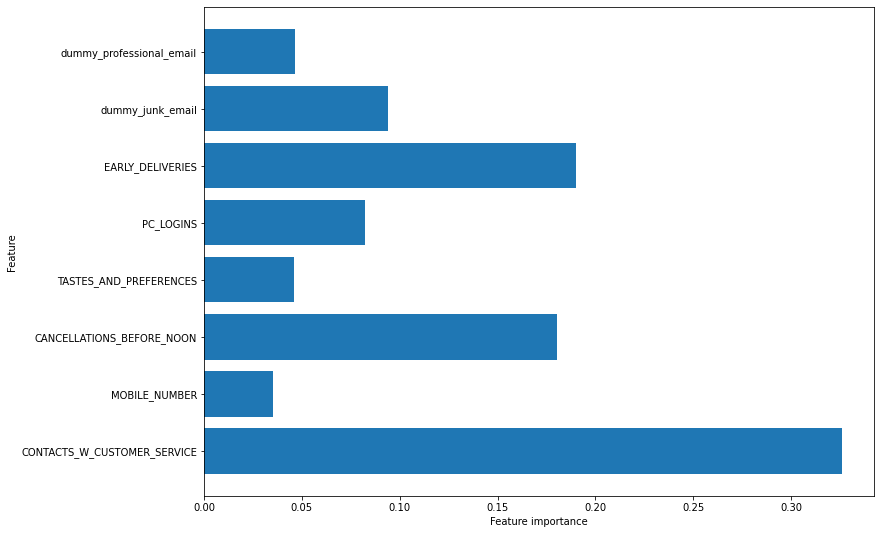

In [67]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit, train = x_train_full, export = False)


In [68]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test_full, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 58
False Positives: 98
False Negatives: 56
True Positives : 275



In [69]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train_full, y_train_full).round(4)
rf_test_acc  = rf_default_fit.score(x_test_full, y_test_full).round(4)
rf_auc       = roc_auc_score(y_true  = y_test_full,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


In [70]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train_full, y_train_full)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test_full)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 100)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)

########################################## COMENTED FOR PERFORMANCE ############################
# forest_cv.fit(chef_data_full, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

In [71]:
# building a model based on hyperparameter tuning results

forest_tuned = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)

# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_data_full, chef_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test_full)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train_full, y_train_full).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test_full, y_test_full).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train_full, y_train_full).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test_full, y_test_full).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test_full,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7553
Forest Tuned Testing  ACCURACY: 0.7618
Forest Tuned AUC Score        : 0.6553


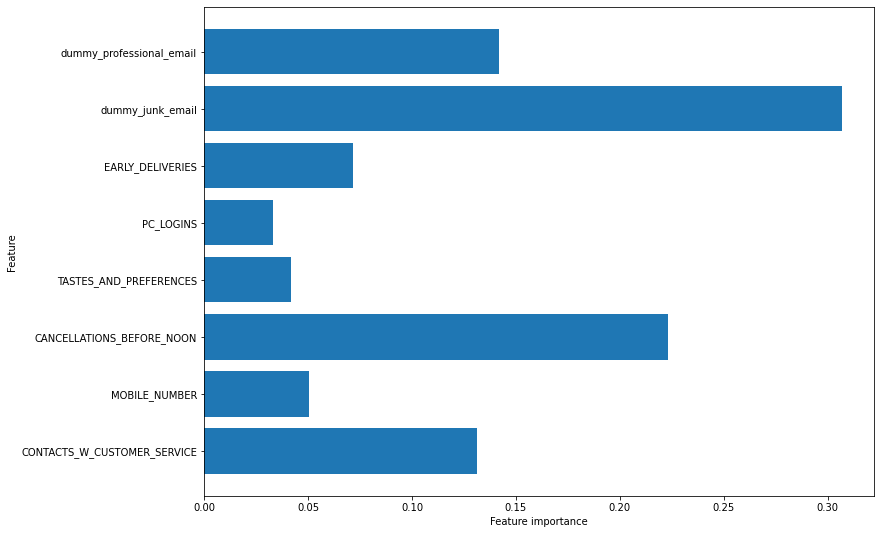

In [72]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train_full,
                         export = False)

In [73]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test_full, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 16
True Positives : 315



In [74]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train_full, y_train_full).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test_full, y_test_full).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test_full,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h3>Gradient Boosted Machines</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [75]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 350,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(chef_data_full, chef_target)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test_full)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train_full, y_train_full).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7697
Testing ACCURACY : 0.7988
AUC Score        : 0.7113


In [84]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test_full, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 73
False Positives: 83
False Negatives: 15
True Positives : 316



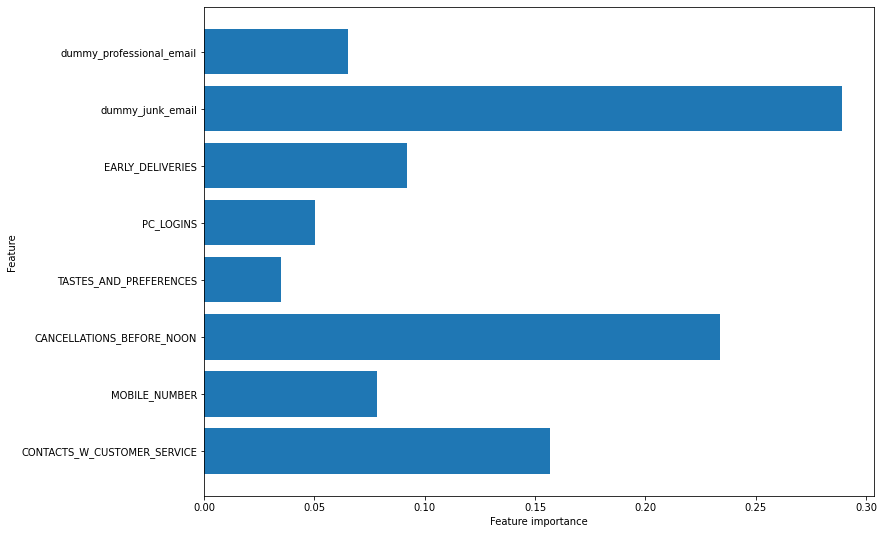

In [85]:
# plotting feature importances
plot_feature_importances(full_gbm_default_fit,
                         train = x_train_full,
                         export = False)

In [77]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train_full, y_train_full).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test_full, y_test_full).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test_full,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


In [78]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 25)
depth_space        = pd.np.arange(1, 20, 2)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 350,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
########################### Commented for performance ####################
# full_gbm_cv.fit(chef_data_full, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [79]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [80]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.9000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(chef_data_full, chef_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test_full)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = gbm_tuned_pred).round(4))


Training ACCURACY: 0.7375
Testing  ACCURACY: 0.7454
AUC Score        : 0.6432


In [81]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test_full, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 24
True Positives : 307



In [82]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train_full, y_train_full).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test_full, y_test_full).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test_full,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
1,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"
2,Tuned LR,0.6308,0.7265,0.7331,"(54, 102, 28, 303)"
3,Tuned Tree,0.6370,0.7300,0.7392,"(55, 101, 26, 305)"
4,Random Forest (Full),0.6013,0.8903,0.6838,"(58, 98, 56, 275)"
5,Tuned Random Forest (Full),0.6553,0.7553,0.7618,"(56, 100, 16, 315)"
6,GBM (Full),0.7113,0.7697,0.7988,"(73, 83, 15, 316)"
7,Tuned GBM,0.6432,0.7375,0.7454,"(56, 100, 24, 307)"
8,Logistic,0.6078,0.7156,0.7064,"(52, 104, 39, 292)"
9,Pruned Tree (Full),0.6176,0.7258,0.7105,"(56, 100, 41, 290)"


In [83]:
# saving the DataFrame to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Conclusion</h2>

Based on the model comparison we decided that our GBM Full version has the best results. We minimized the errors
compared to the previous versions of the models and maximized the true positives and negatives. We don't have any
indication of overfit when we compare our testing and training data and this model has the best AUC compared to its 
base model and to all of the other models we ran.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />